In [6]:
#import data manipulation libraries
import numpy as np
import pandas as pd

#import data visualziation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import logging 
import logging
logging.basicConfig(filename='model.log',
                    level=logging.INFO,
                    filemode='w',
                      format='%(asctime)s:%(levelname)s:%(message)s',
                      force=True)

import warnings
warnings.filterwarnings('ignore')



In [7]:
#data import using pandas function
url="https://raw.githubusercontent.com/Frisk516/Lung_cancer_MLModel/refs/heads/main/survey%20lung%20cancer.csv"
df=pd.read_csv(url,sep=',')
#shuffle the dataset
df.sample(frac=1)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
118,F,54,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
106,F,61,2,2,2,2,2,2,1,1,1,1,2,2,1,YES
35,F,59,2,2,2,1,2,1,1,1,1,1,2,2,1,YES
302,F,65,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
26,F,61,2,2,2,1,1,2,2,1,2,1,2,2,2,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,M,71,1,1,1,1,2,2,2,2,2,2,2,1,2,YES
66,F,56,1,2,1,1,2,2,2,2,1,2,2,1,2,YES
270,F,70,2,1,1,1,1,2,1,1,1,1,2,1,1,NO
109,M,53,1,1,1,1,2,2,2,1,2,1,2,1,2,YES


In [8]:
logging.info("Data imported successfully")

In [9]:
#separating numerical and categorical data
numerical_data=df.select_dtypes(exclude=object)
categorial_data=df.select_dtypes(include=object)

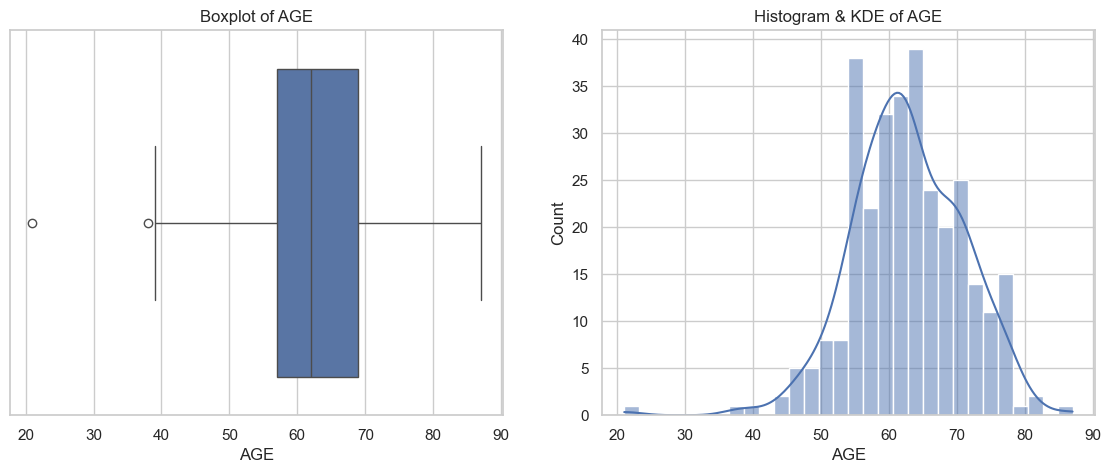

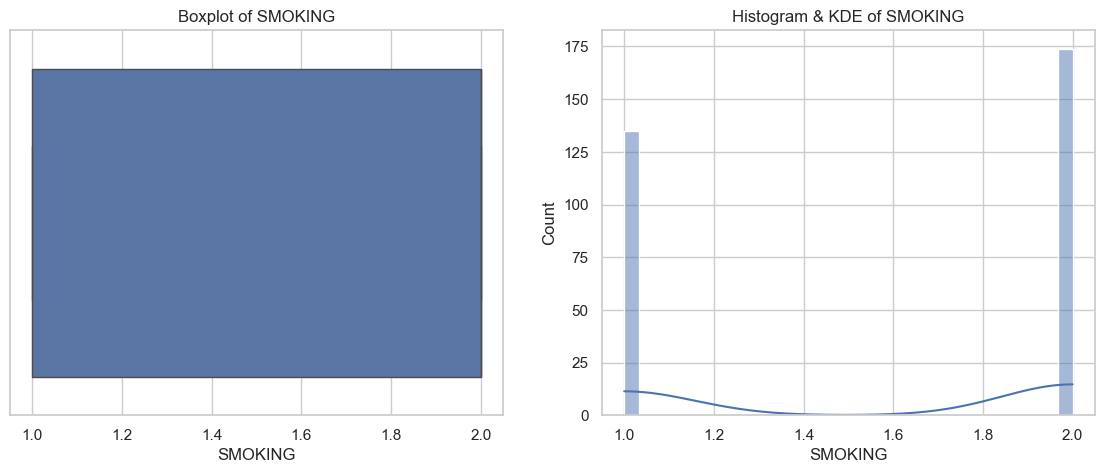

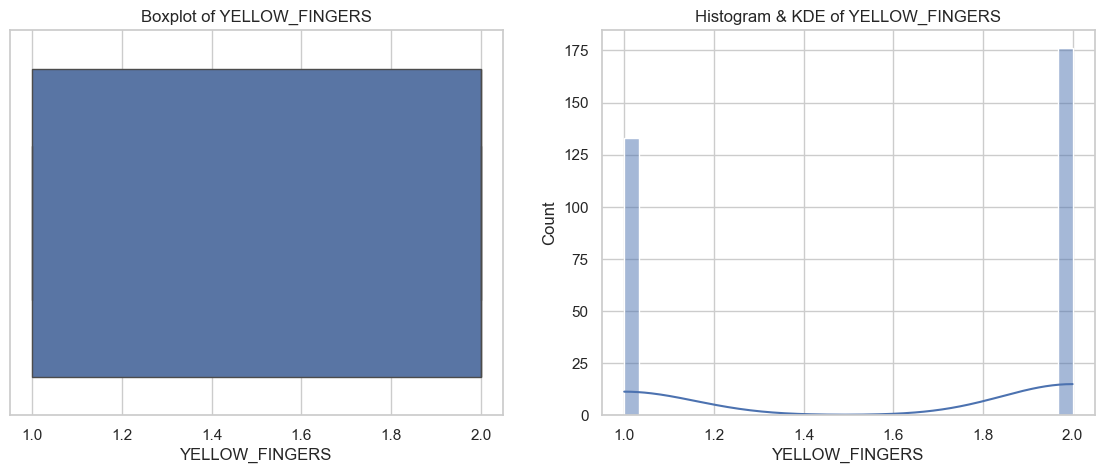

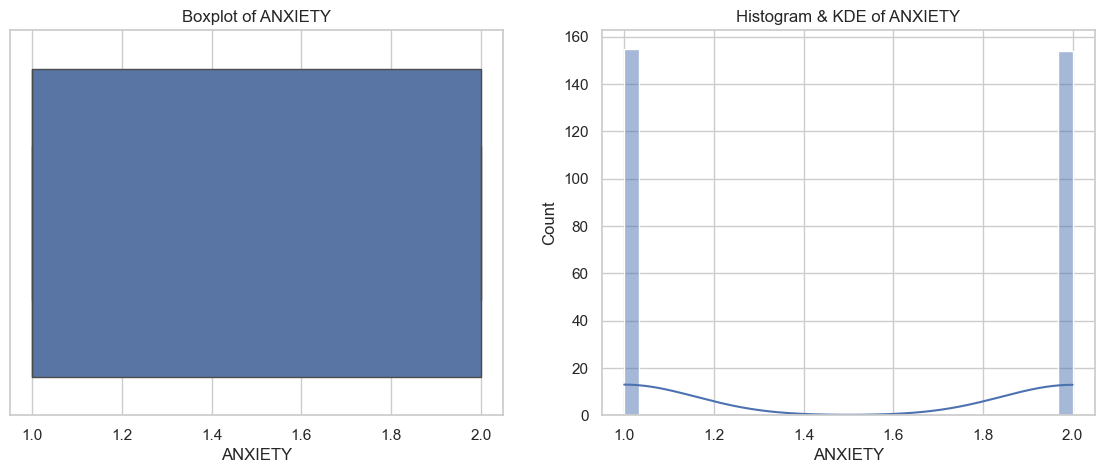

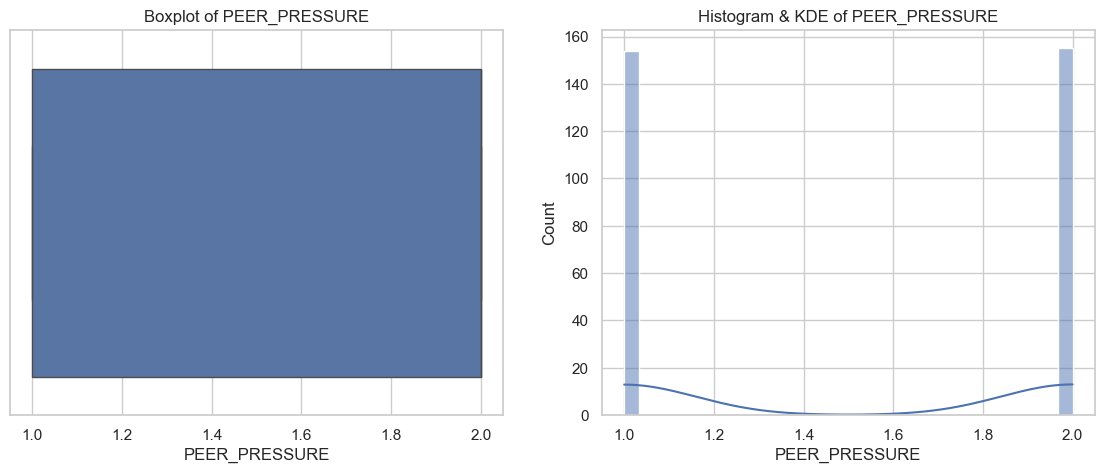

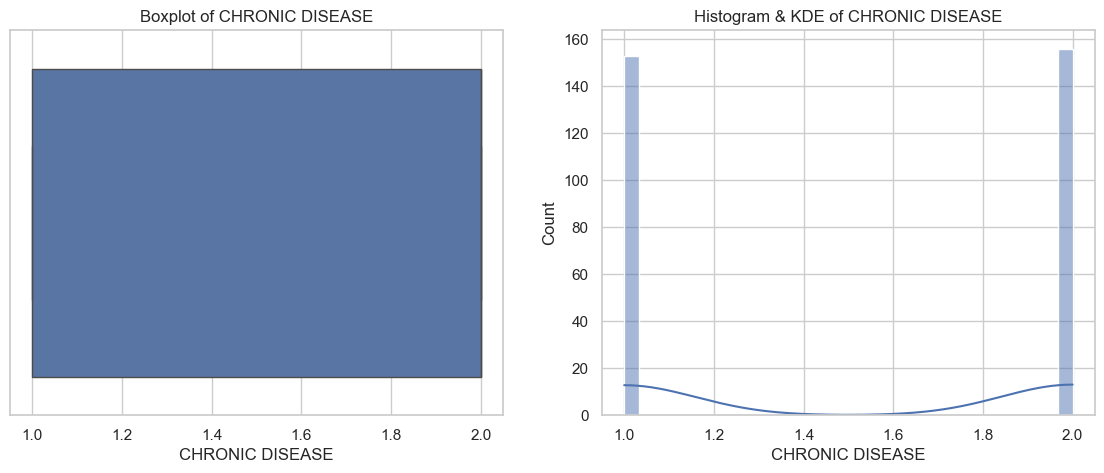

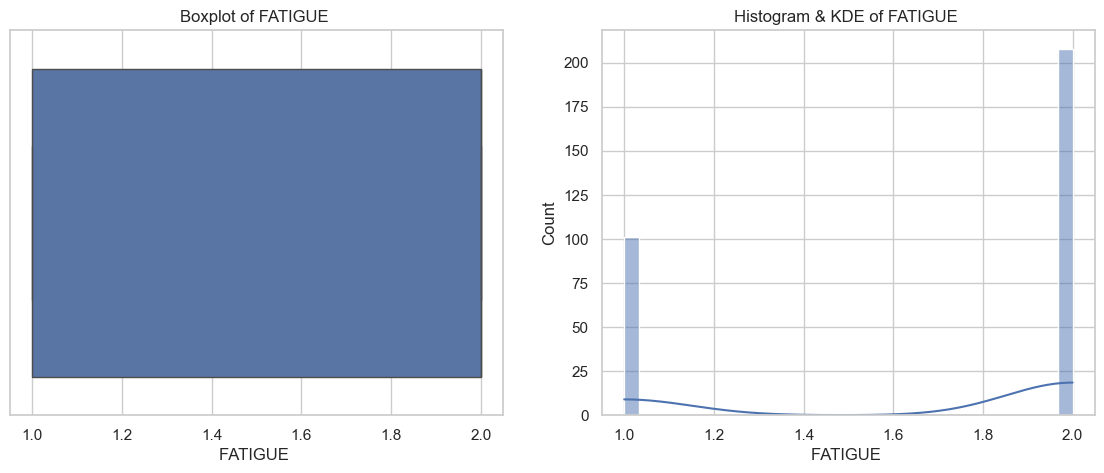

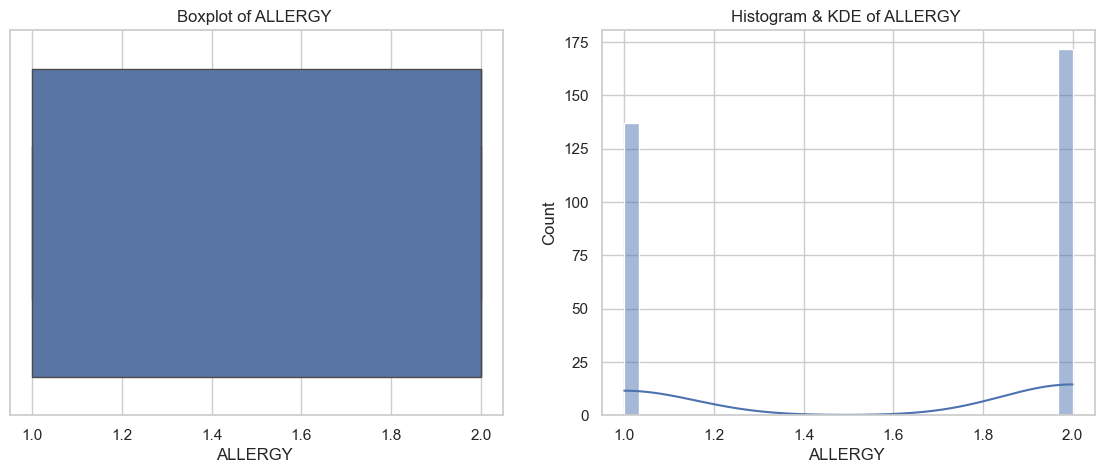

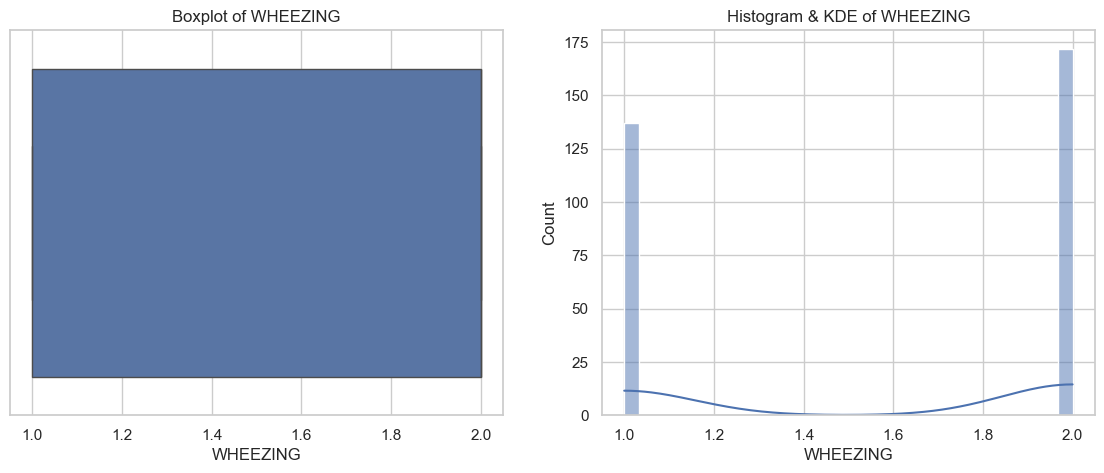

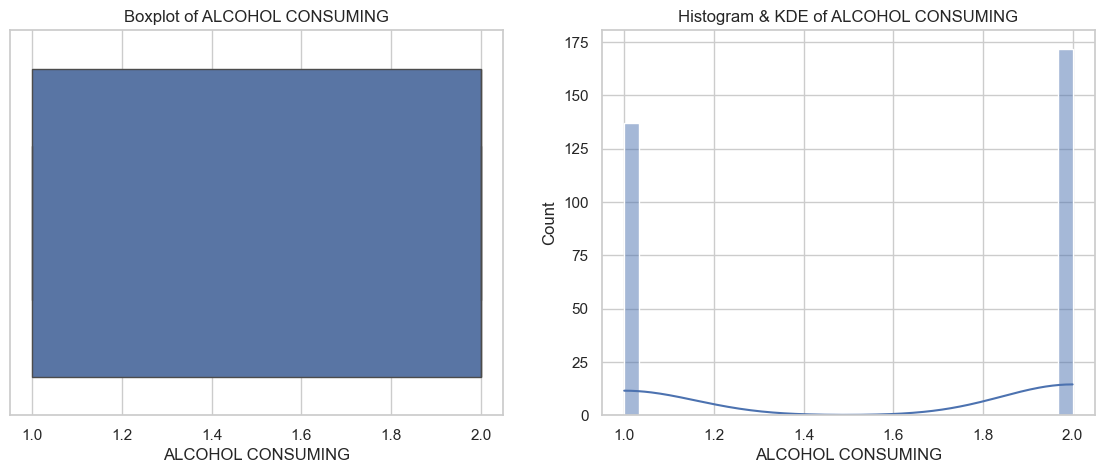

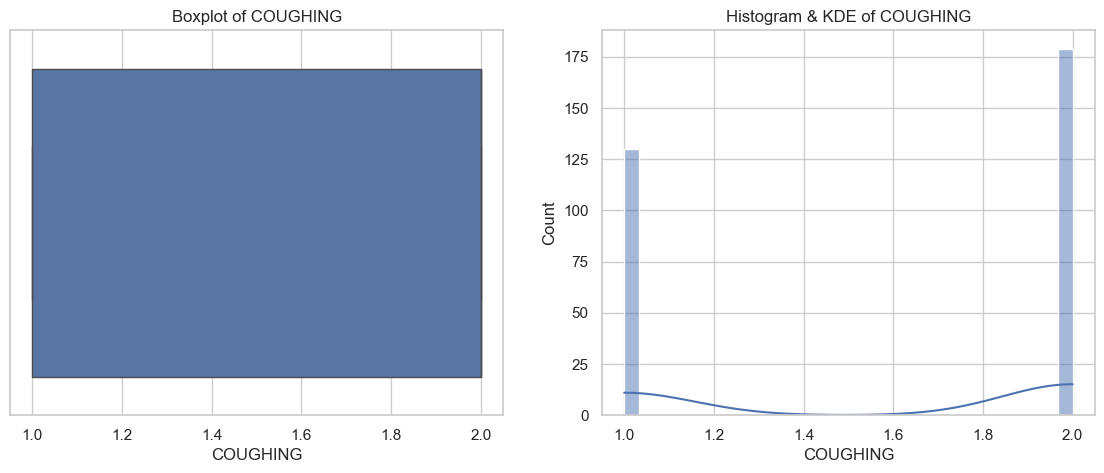

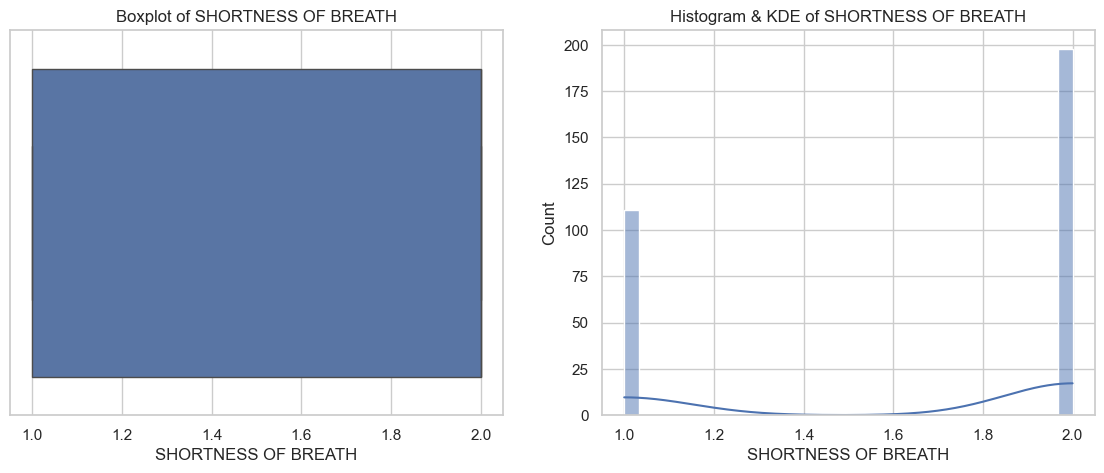

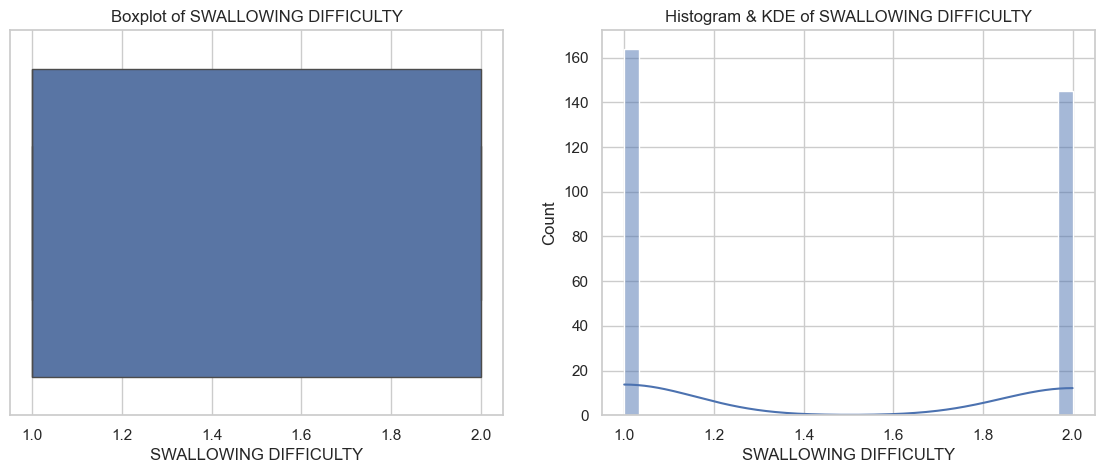

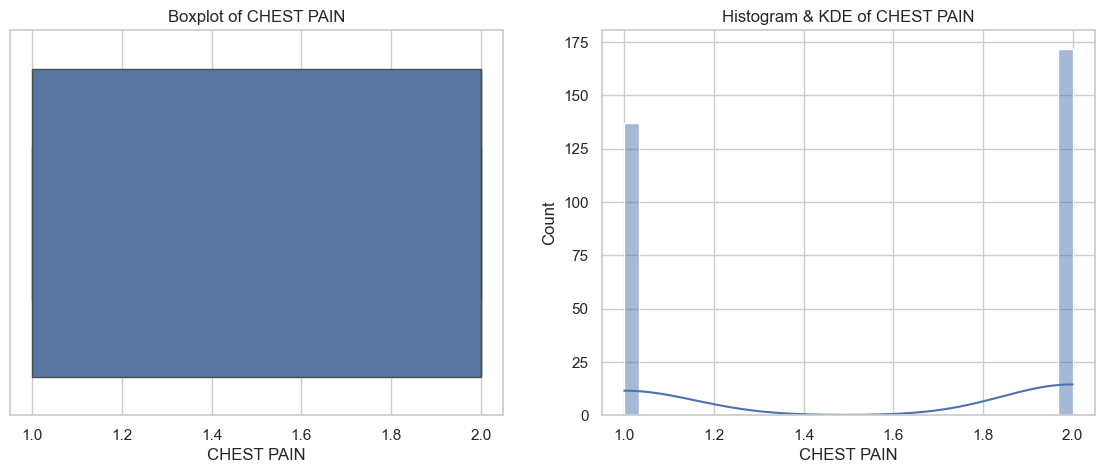

In [10]:
# Set plot style
sns.set(style="whitegrid")

# Plot boxplots and bell curves for each numerical feature
for col in numerical_data.columns:
    plt.figure(figsize=(14, 5))
    
    # Boxplot (shows outliers as points beyond whiskers)
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    # Bell curve: histogram + KDE (to check distribution shape)
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')
    
    plt.show()

In [11]:
#performing EDA

from collections import OrderedDict
stats=[]
for i in numerical_data:
    numerical_stats=OrderedDict({
        'feature':i,
        'mean':df[i].mean(),
        'median':df[i].median(),
        'mode':df[i].mode()[0],
        'std':df[i].std(),
        'min':df[i].min(),
        'max':df[i].max(),
        'skewness':df[i].skew(),
        'kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    report=pd.DataFrame(stats)


# Outlier Identification :
outlier_label = []
for col in report['feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,feature,mean,median,mode,std,min,max,skewness,kurtosis,Outlier Comment
0,AGE,62.673139,62.0,64,8.210301,21,87,-0.395086,1.746558,Has Outliers
1,SMOKING,1.563107,2.0,2,0.496806,1,2,-0.255705,-1.947261,No Outliers
2,YELLOW_FINGERS,1.569579,2.0,2,0.495938,1,2,-0.282425,-1.932789,No Outliers
3,ANXIETY,1.498382,1.0,1,0.500808,1,2,0.006504,-2.013029,No Outliers
4,PEER_PRESSURE,1.501618,2.0,2,0.500808,1,2,-0.006504,-2.013029,No Outliers
5,CHRONIC DISEASE,1.504854,2.0,2,0.500787,1,2,-0.019513,-2.012689,No Outliers
6,FATIGUE,1.673139,2.0,2,0.469827,1,2,-0.741836,-1.459167,No Outliers
7,ALLERGY,1.556634,2.0,2,0.497588,1,2,-0.229118,-1.960235,No Outliers
8,WHEEZING,1.556634,2.0,2,0.497588,1,2,-0.229118,-1.960235,No Outliers
9,ALCOHOL CONSUMING,1.556634,2.0,2,0.497588,1,2,-0.229118,-1.960235,No Outliers


In [12]:
#the data is non-normally distributed
logging.info("The data is non-normally distributed")


In [13]:
#check for null values
df.isnull().sum()


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [14]:
#encoding gender and lung cancer columns

df['GENDER']=df['GENDER'].replace({'M':1,'F':2})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES':2,'NO':1})


In [15]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2,56,1,1,1,2,2,2,1,1,2,2,2,2,1,2
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,2


In [16]:
df['LUNG_CANCER'].value_counts()
#target column shows imbalanced data

LUNG_CANCER
2    270
1     39
Name: count, dtype: int64

In [17]:
#dividing the dataset to prevent data leakage
X=df.drop('LUNG_CANCER',axis=1)
y=df['LUNG_CANCER']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#the dataset has minor outliers
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)




In [18]:
#after balancing,we will be using logistic regression because the target column is binary in nature
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[13  3]
 [ 6 71]]
              precision    recall  f1-score   support

           1       0.68      0.81      0.74        16
           2       0.96      0.92      0.94        77

    accuracy                           0.90        93
   macro avg       0.82      0.87      0.84        93
weighted avg       0.91      0.90      0.91        93

